## Notebook Purpose

create, view different versions of poisson disc mask

In [1]:
import os, sys
import numpy as np
import torch
import matplotlib.pyplot as plt
import sigpy
from sigpy.mri.samp import poisson

# TODO

- compare performance w new mask containing rectangular central region
- generate two non-overlapping poisson disc masks
    - source code: https://sigpy.readthedocs.io/en/latest/generated/sigpy.mri.poisson.html?highlight=poisson#sigpy.mri.poisson

### create mask

In [50]:
# create mask
ACCEL = 12
mask = poisson(img_shape=(512, 160), accel=ACCEL)
mask = torch.from_numpy(mask)
mask = abs(mask).type(torch.uint8)

### force central rectangular region to be 1's

- want to set 4096 pixels to 1, because originally we did a 64 * 64 = 4096 square region
- to make this region rectangular, find x s.t. (160/x) * (512/x) = 4096
    - x = 8.9443

In [51]:
size_region = 4096 # number of pixels we'll force to 1
num_y, num_z = mask.shape[0], mask.shape[1] # number of pixels in (y,z)
mid_y, mid_z = num_y // 2, num_z // 2 # middle index in (y,z)

sf = np.sqrt((num_y * num_z) / size_region) # scaling factor
# length of region from center, hence div by 2
len_y, len_z = int(num_y / (2*sf)) + 1, int(num_z / (2*sf)) + 1

mask[mid_y-len_y:mid_y+len_y, mid_z-len_z:mid_z+len_z] = 1

# # previously: square region of central 2*C x 2*C
# idx_y, idx_z = mask.shape[0] // 2, mask.shape[1] // 2
# C=32
# mask[idx_y-C:idx_y+C, idx_z-C:idx_z+C] = 1

In [53]:
assert mask.shape == torch.Size([512,160])
accel_adj = float(1. / (torch.count_nonzero(mask) / (512*160)))

print('given accel {}, factor adjusted to {} after forcing CxC 1s'.format(
        ACCEL, np.round(accel_adj,4)))

mask.shape

given accel 12, factor adjusted to 8.0243 after forcing CxC 1s


torch.Size([512, 160])

In [54]:
# np.save('mask_poisson_disc_4x.npy', mask)

# mask = np.load('mask_poisson_disc_4x.npy')

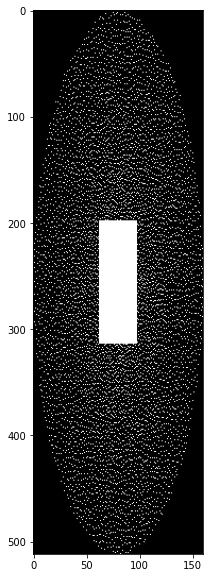

In [55]:
FIGSIZE=10
plt.figure(figsize=(FIGSIZE,FIGSIZE))
plt.imshow(mask, cmap='gray')
plt.show()